In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


## Import dataset

In [3]:
df1 = pd.read_excel('case_study1.xlsx')
df2 = pd.read_excel('case_study2.xlsx')

In [4]:
df1 = df1.copy()
df2 = df2.copy()

In [5]:
display(df1.head())
display(df2.head())
print(df1.shape)
print(df2.shape)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


(51336, 26)
(51336, 62)


## EDA

### Removing Null values rows and columns where NA is >10000 from df1 and df2

In [6]:
#remove nulls from df1
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [8]:
#removing columns from df2  where column has more than 10000 NAs values
columns_to_be_removed = []

for i in df2.columns:
  if df2.loc[df2[i] == -99999].shape[0]>10000:
    columns_to_be_removed.append(i)


len(columns_to_be_removed)

8

In [9]:
df2 =df2.drop(columns_to_be_removed, axis = 1)
df2.shape

(51336, 54)

In [19]:
#Now removing the rows from df2 where null values are present
for i in df2.columns:
  df2 = df2.loc[df2[i] != -99999]

df2.shape

(42066, 54)

### Merge df1 and df2

In [20]:
#finding common column for merge
for i in list(df1.columns):
  if i in df2.columns:
    print(i)


PROSPECTID


In [21]:
df = pd.merge(df1, df2, how = 'inner',left_on = ['PROSPECTID'],right_on = ['PROSPECTID'])
df.shape

(42064, 79)

### Finding categorical values

In [22]:
cat_features = []
for i in df.columns:
  if df[i].dtype == 'object':
    cat_features.append(i)

print(cat_features)

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2', 'Approved_Flag']


In [23]:
for i in cat_features:
  print(df[i].value_counts())
  print("")


MARITALSTATUS
Married    30886
Single     11178
Name: count, dtype: int64

EDUCATION
GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: count, dtype: int64

GENDER
M    37345
F     4719
Name: count, dtype: int64

last_prod_enq2
ConsumerLoan    16480
others          13653
PL               7553
CC               2195
AL               1353
HL                830
Name: count, dtype: int64

first_prod_enq2
others          20640
ConsumerLoan    11075
PL               4431
AL               2641
CC               1988
HL               1289
Name: count, dtype: int64

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64



**1. Null Hypothesis**

H0: Marrital status are not associated with Approved Flag 

H1: Marital staus are associated with Approved Flag


**2. Alpha (assumed = 0.05) / significance level (assumed = 95%)**

- calculate the evidence against H0

- calculate using tests T-Test. Anova, Chi 

- if p-value < alpha then we can reject the null hypothesis


**Tests**
- chi     = cat vs cat
- T-test  = cat vs Num (2 categories)
- ANOVA   =  cat vs Num (>= 3 categories)


#### Feature selection of cat features based on chi-squared test

In [24]:
#chi square test
from scipy.stats import chi2_contingency

# print(cat_features)

for i in cat_features: 
    chi2, pvalue, dof, expected = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i,'-------------', pvalue)


MARITALSTATUS ------------- 3.578180861038862e-233
EDUCATION ------------- 2.6942265249737532e-30
GENDER ------------- 1.907936100186563e-05
last_prod_enq2 ------------- 0.0
first_prod_enq2 ------------- 7.84997610555419e-287
Approved_Flag ------------- 0.0


### Finding Numerical Features

In [25]:
num_features = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        num_features.append(i)

print('Total No of Numerical Features:', len(num_features))

Total No of Numerical Features: 72


#### VIF - varaince inflation factor 

**Multicolinearity vs Correlation**

Definitions
- <span style="color: blue;">**Multicollinearity**</span>: The predictability of each feature by other features.
- <span style="color: green;">**Correlation**</span>: Specific to the linear relationship between columns or features.

Variance Inflation Factor (VIF)
The VIF is calculated using the formula:

VIF = [1/(1 - R^2)]

VIF Ranges
- <span style="color: gray;">**VIF = 1**</span>: Indicates no multicollinearity.
- <span style="color: orange;">**VIF between 5 and 10**</span>: Indicates moderate multicollinearity.
- <span style="color: red;">**VIF above 10**</span>: Indicates high multicollinearity.


In [26]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = df[num_features]
display(vif_data.head())


,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
0,5,4,1,0,0,0.000,0.0,0.200,0.800,0,...,0.798,0,1,0.0,0.0,0.000,0.0,1,0,696
1,1,0,1,0,0,0.000,0.0,1.000,0.000,1,...,0.370,0,0,0.0,0.0,0.000,0.0,0,0,685
2,8,0,8,1,0,0.125,0.0,1.000,0.000,2,...,0.585,0,0,0.0,0.0,0.000,0.0,1,0,693
3,3,2,1,0,0,0.000,0.0,0.333,0.667,0,...,0.000,0,0,0.0,0.0,0.000,0.0,0,0,753
4,6,5,1,0,0,0.000,0.0,0.167,0.833,0,...,0.000,0,0,1.0,0.0,0.429,0.0,1,0,668


In [27]:
columns_to_drop = []
for i in range(len(vif_data.columns)):
    vif_value = variance_inflation_factor(vif_data.values, i)
    if vif_value >= 6:
        columns_to_drop.append(vif_data.columns[i])
        print(vif_data.columns[i],'--',vif_value)

vif_data = vif_data.drop(columns=columns_to_drop)
print(len(columns_to_drop))

/Users/sudhirjoon/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Total_TL -- inf
Tot_Closed_TL -- inf
Tot_Active_TL -- inf
Total_TL_opened_L6M -- 8.386094184170567
Tot_TL_closed_L6M -- 6.822916488054288
pct_active_tl -- inf
pct_closed_tl -- 1788.95771490895
Total_TL_opened_L12M -- 15.200137933469819
Tot_TL_closed_L12M -- 9.044617706396677
Auto_TL -- inf
CC_TL -- inf
Consumer_TL -- inf
Gold_TL -- inf
Home_TL -- inf
PL_TL -- inf
Secured_TL -- inf
Unsecured_TL -- inf
Other_TL -- inf
num_times_delinquent -- 6.96131446746582
num_deliq_6mts -- inf
num_deliq_12mts -- inf
num_deliq_6_12mts -- inf
num_times_30p_dpd -- 12.754547497478903
num_times_60p_dpd -- 7.664123029753517
num_std -- 6.319428106041929
num_std_6mts -- 14.347518490310222
num_std_12mts -- 22.676698796484057
num_dbt_6mts -- 7.359834228686917
num_dbt_12mts -- 9.477320189403187
num_lss_6mts -- 6.530587744367455
num_lss_12mts -- 8.171238534079553
tot_enq -- 12.066242728970064
CC_enq -- 7.237096207319056
CC_enq_L6m -- 8.504957073040297
CC_enq_L12m -- 11.264651252660999
PL_enq -- 9.19020408532642
P

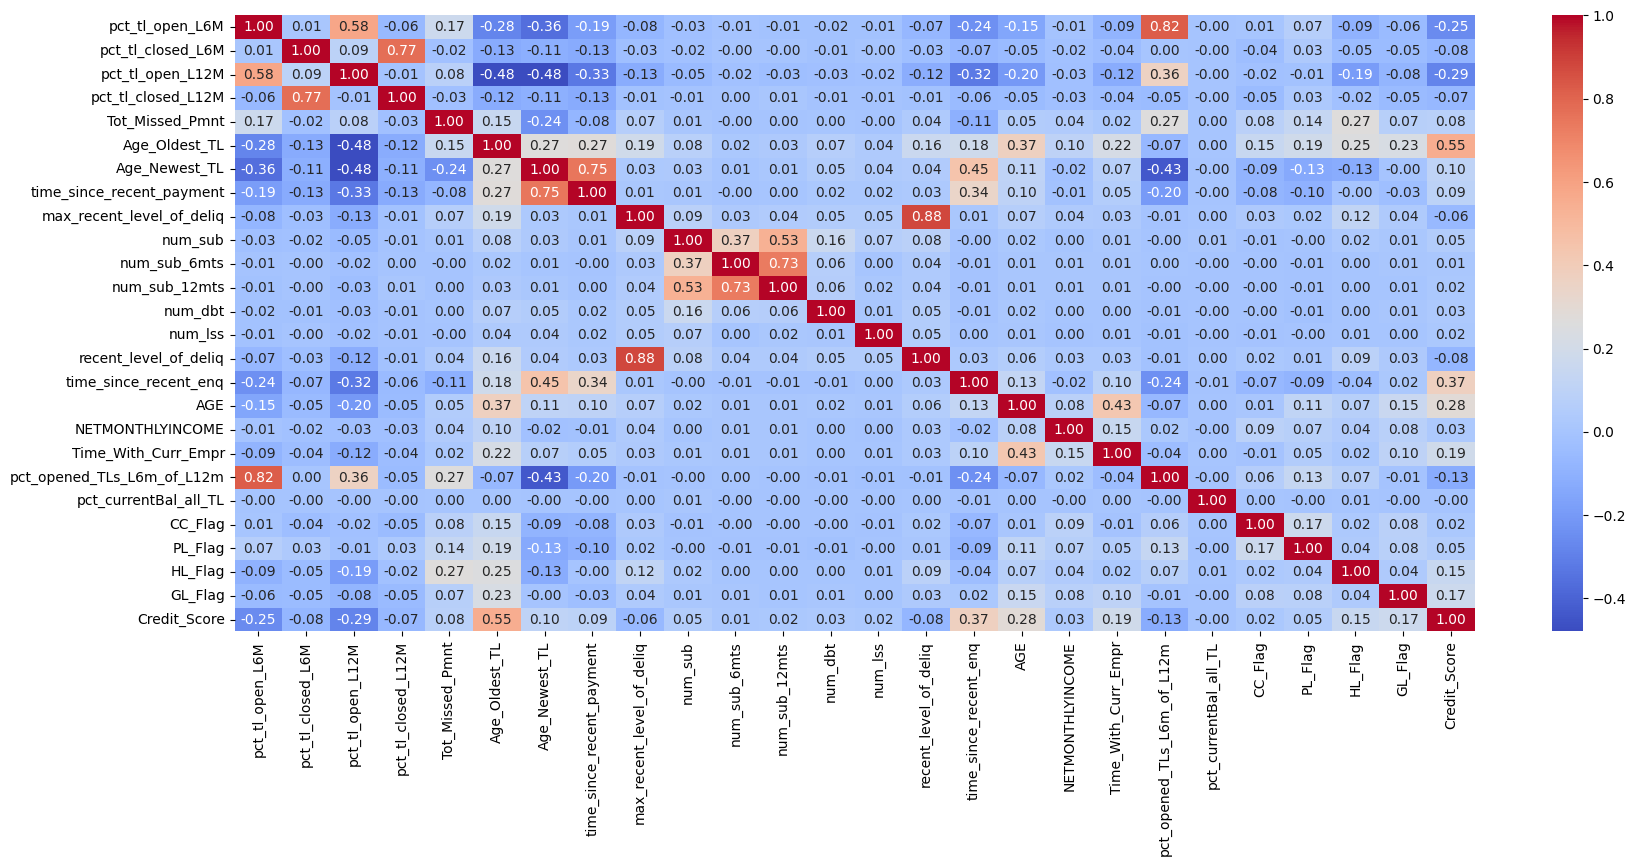

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = vif_data.corr()

# Generate a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


### ANOVA

In [29]:
from scipy.stats import f_oneway
columns_to_be_kept_num = []

for i in vif_data.columns:
    a = list(df[i])
    b = list(df['Approved_Flag']) 

    gropu_p1 = [value for value, group in zip(a, b) if group == 'P1']
    gropu_p2 = [value for value, group in zip(a, b) if group == 'P2']
    gropu_p3 = [value for value, group in zip(a, b) if group == 'P3']
    gropu_p4 = [value for value, group in zip(a, b) if group == 'P4']

    f_statistic,p_value = f_oneway(gropu_p1,gropu_p2,gropu_p3,gropu_p4)

    if p_value <= 0.05:
        columns_to_be_kept_num.append(i)

#print
len(columns_to_be_kept_num)

25

In [39]:
df_num_clean = df[columns_to_be_kept_num]
df_cat = df[cat_features]

display('No of cat features:', df_cat.shape)
display('No of cleaned num cols:', df_num_clean.shape)
# df_num_clean.head()
# df_cat.head()

df_clean = pd.concat([df_num_clean,df_cat], axis=1)
display(df_clean.head())


'No of cat features:'

(42064, 6)

'No of cleaned num cols:'

(42064, 25)

,pct_tl_open_L6M,pct_tl_closed_L6M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_sub,...,PL_Flag,HL_Flag,GL_Flag,Credit_Score,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.0,0.00,0.000,0,72,18,549,29,0,...,1,1,0,696,Married,2,M,PL,PL,P2
1,0.000,0.0,1.00,0.000,0,7,7,47,0,0,...,0,0,0,685,Single,3,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.0,0.25,0.000,1,47,2,302,25,0,...,0,1,0,693,Married,1,M,ConsumerLoan,others,P2
3,0.000,0.0,0.00,0.000,0,131,32,583,0,0,...,0,0,0,753,Married,4,M,AL,AL,P1
4,0.000,0.0,0.00,0.167,0,150,17,245,270,3,...,0,1,0,668,Married,2,M,ConsumerLoan,PL,P3


### Encoding

#### Label Encoding for ordinal features

In [40]:
print('Before label encoding :',df['EDUCATION'].value_counts())
print('')

df_clean.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]               = 1
df_clean.loc[df['EDUCATION'] == '12TH',['EDUCATION']]              = 2
df_clean.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]          = 3
df_clean.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]    = 3
df_clean.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df_clean.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3
df_clean.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1


Before label encoding : EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64



**Data Summary**

Total columns left in dataset after dropping columns on basis of multicollinearity (VIF) are 26 columns

- Total columns in df 79
    - Numerical Columns = 72
    - Categorical Columns = 7

**after VIF**
    - No of column dropped = 46
    - 26 Numerical Columns
    - 7 Categorical Columns
    -  Total = 33 columns

**after anova**
    - No of column dropped = 1
    - 25 Numerical Columns
    - 7 Categorical Columns
    -  Total = 32 columns

**after Label Encoding**
    - No of column dropped = 1
    - 25 Numerical Columns
    - 7 Categorical Columns
    -  Total = 32 columns

**after OHE Encoding**

    


#### OneHotEncoding

In [48]:
display(df_clean.head())
df_clean.shape

,pct_tl_open_L6M,pct_tl_closed_L6M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_lss,recent_level_of_deliq,time_since_recent_enq,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.0,0.00,0.000,0,72,18,549,29,0,0,0,0,0,29,566,48,51000,114,0.0,0,1,1,0,696,Married,2,M,PL,PL,P2
1,0.000,0.0,1.00,0.000,0,7,7,47,0,0,0,0,0,0,0,209,23,19000,50,0.0,0,0,0,0,685,Single,3,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.0,0.25,0.000,1,47,2,302,25,0,0,0,0,0,25,587,40,18,191,0.5,0,0,1,0,693,Married,1,M,ConsumerLoan,others,P2
3,0.000,0.0,0.00,0.000,0,131,32,583,0,0,0,0,0,0,0,3951,48,15000,75,0.0,0,0,0,0,753,Married,4,M,AL,AL,P1
4,0.000,0.0,0.00,0.167,0,150,17,245,270,3,0,1,0,0,26,7,35,0,154,0.0,0,0,1,0,668,Married,2,M,ConsumerLoan,PL,P3


(42064, 31)

In [50]:
df_clean_encoded = pd.get_dummies(df_clean, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'],dtype = int, drop_first= True)
display(df_clean_encoded.head())
df_clean_encoded.shape

,pct_tl_open_L6M,pct_tl_closed_L6M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_lss,recent_level_of_deliq,time_since_recent_enq,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score,EDUCATION,Approved_Flag,MARITALSTATUS_Single,GENDER_M,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0.00,0.000,0,72,18,549,29,0,0,0,0,0,29,566,48,51000,114,0.0,0,1,1,0,696,2,P2,0,1,0,0,0,1,0,0,0,0,1,0
1,0.000,0.0,1.00,0.000,0,7,7,47,0,0,0,0,0,0,0,209,23,19000,50,0.0,0,0,0,0,685,3,P2,1,0,0,1,0,0,0,0,1,0,0,0
2,0.125,0.0,0.25,0.000,1,47,2,302,25,0,0,0,0,0,25,587,40,18,191,0.5,0,0,1,0,693,1,P2,0,1,0,1,0,0,0,0,0,0,0,1
3,0.000,0.0,0.00,0.000,0,131,32,583,0,0,0,0,0,0,0,3951,48,15000,75,0.0,0,0,0,0,753,4,P1,0,1,0,0,0,0,0,0,0,0,0,0
4,0.000,0.0,0.00,0.167,0,150,17,245,270,3,0,1,0,0,26,7,35,0,154,0.0,0,0,1,0,668,2,P3,0,1,0,1,0,0,0,0,0,0,1,0


(42064, 39)

In [90]:
from sklearn.model_selection import train_test_split
X= df_clean_encoded.drop(['Approved_Flag'],axis = 1)
y = df_clean_encoded['Approved_Flag']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 299)

In [91]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(33651, 38)
(8413, 38)
(33651,)
(8413,)


## Model Development

### Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

dt = DecisionTreeClassifier(criterion= 'entropy',max_depth= 3)


y_train_pred = cross_val_predict(dt, X_train,y_train,cv = 2)

clf_val_report = classification_report(y_train, y_train_pred, labels = df_clean_encoded['Approved_Flag'].unique())

print('classification_report_validation_set \n',clf_val_report)

#prediction on test set 
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

clf_report_test_set = classification_report(y_test, y_pred, labels = df_clean_encoded['Approved_Flag'].unique())
print('classification_report_validation_set \n',clf_report_test_set)

classification_report_validation_set 
               precision    recall  f1-score   support

          P2       1.00      1.00      1.00     20385
          P1       1.00      0.96      0.98      3911
          P3       0.97      1.00      0.98      5164
          P4       1.00      1.00      1.00      4191

    accuracy                           1.00     33651
   macro avg       0.99      0.99      0.99     33651
weighted avg       1.00      1.00      1.00     33651

classification_report_validation_set 
               precision    recall  f1-score   support

          P2       1.00      1.00      1.00      5067
          P1       1.00      0.96      0.98       997
          P3       0.97      1.00      0.98      1276
          P4       1.00      1.00      1.00      1073

    accuracy                           1.00      8413
   macro avg       0.99      0.99      0.99      8413
weighted avg       1.00      1.00      1.00      8413



In [118]:
unique_values, counts = np.unique(y_train, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value} appears {count} times.")

P1 appears 3911 times.
P2 appears 20385 times.
P3 appears 5164 times.
P4 appears 4191 times.


In [119]:
unique_values, counts = np.unique(y_train_pred, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value} appears {count} times.")

P1 appears 3762 times.
P2 appears 20385 times.
P3 appears 5312 times.
P4 appears 4192 times.


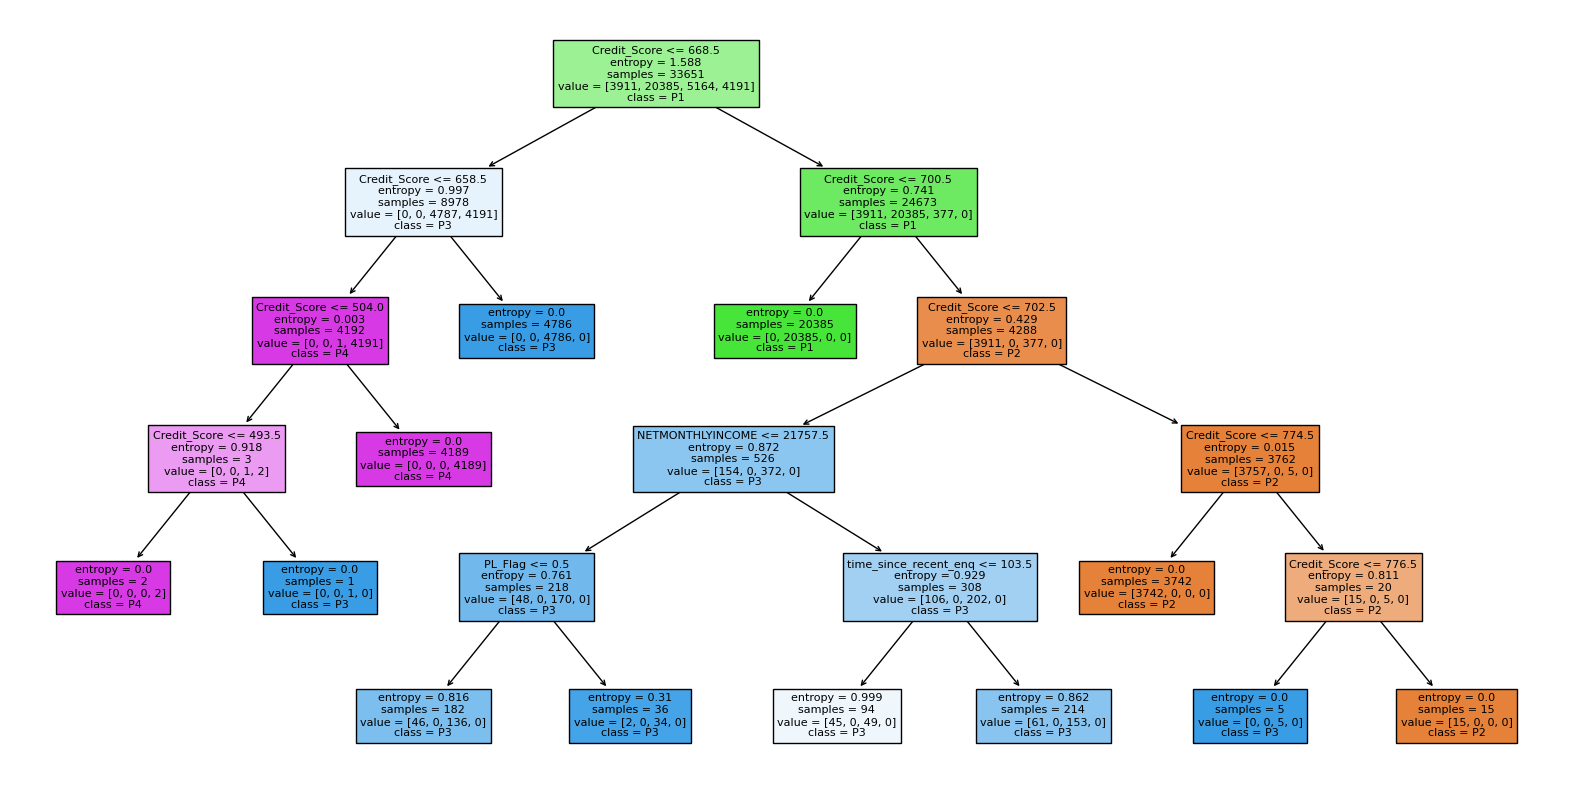

In [110]:
# Visualize the tree
from sklearn import tree
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dt, feature_names=df_clean_encoded.columns, class_names= df_clean_encoded['Approved_Flag'].unique(), filled=True)
plt.show()